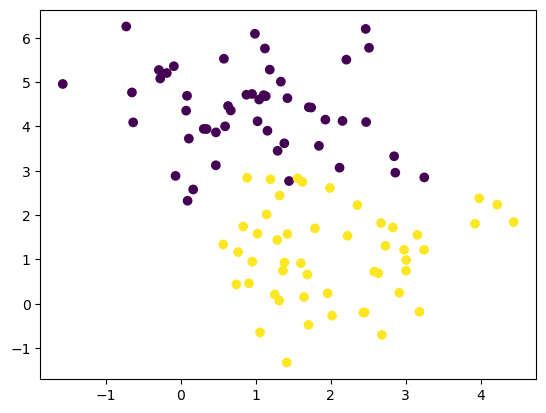

In [5]:
from sklearn.datasets import make_blobs
X_, y = make_blobs(n_samples=100,centers=2,random_state=0)

import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
#logistic regression
import numpy as np
dummy = np.ones((X_.shape[0],1))
X = np.concatenate((dummy, X_),axis=1)
print(X.shape)

    


(100, 3)


In [8]:
n_samples = X.shape[0]
n_features =X.shape[1]

#GD
eta=0.1
w = np.random.randn(n_features)
step =0
max_step = 1e5
error=1e-4
while step < max_step:
    sigma = X@w
    h = 1/(1+np.exp(-sigma))
    g = 1/n_samples*X.T@(h-y)
    w_old = w
    w = w - eta * g
    if abs(w_old - w).sum()<error:
        break
    step +=1
    
print(step)
print(w)

29751
[11.25321513  0.58031865 -4.47430568]


In [14]:
#sklearn logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 0.01)
lr.fit(X_,y)

LogisticRegression(C=0.01)

In [15]:
print("w1,w2:",lr.coef_)
print("w0 or b:", lr.intercept_)

w1,w2: [[ 0.14019762 -0.43258295]]
w0 or b: [0.96691897]


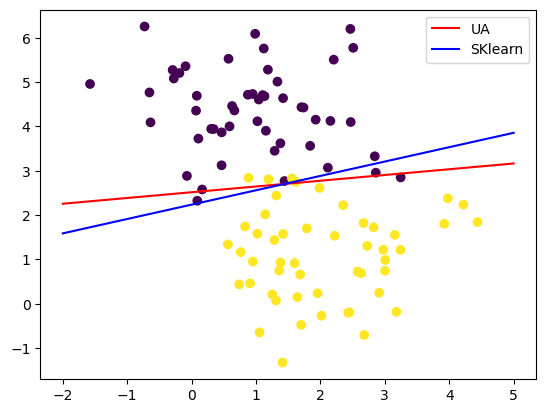

In [16]:
x1 = np.linspace(-2,5,100)
x2_UA = -w[1]/w[2]*x1-w[0]/w[2]
x2_sk= -lr.coef_[0][0]/lr.coef_[0][1]*x1-lr.intercept_/lr.coef_[0][1]
plt.plot(x1,x2_UA,'r',label='UA')
plt.plot(x1,x2_sk,'b',label='SKlearn')
plt.scatter(X_[:,0],X_[:,1],c=y)
plt.legend()

In [16]:
#logistic regression into class
import numpy as np
from sklearn.datasets import make_blobs

class LogisticRegression:
    def __init__(self,eta=0.01,max_steps=10000,error=1e-4):
        self.eta=eta
        self.max_steps=max_steps
        self.error=error
        
    def fit(self,X,y):
        self.n_samples=X.shape[0]
        dummy = np.ones((self.n_samples,1))
        self.X = np.concatenate((dummy, X),axis=1)
        self.y=y
        self.n_features=self.X.shape[1]
        self.w = np.random.randn(self.n_features)
        
        for i in range(self.max_steps):
            #compute gradient descent
            sigma = self.X@self.w
            g = 1/self.n_samples*self.X.T@(self.sigmoid(sigma)-self.y)
            w_old=self.w
            self.w= self.w - self.eta * g
           
           #check convergence
            if np.abs(self.w - w_old).sum()<self.error:
                break
     
    
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def predict(self,X):
        n_samples=X.shape[0]
        dummy = np.ones((n_samples,1))
        X = np.concatenate((dummy, X),axis=1)
        sigma= X@self.w
        y_predict= self.sigmoid(sigma)
        y_predict_cls=[1 if i>0.5 else 0 for i in y_predict]
        return y_predict_cls
    
X,y = make_blobs(n_samples=100,centers=2,random_state=0)
model = LogisticRegression()
model.fit(X,y)
print("Our class implementation prediction:", model.predict(X))
        
            
   

Our class implementation prediction: [1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1]


In [14]:
#Using sklearn Logistic Regression
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_,y_ = make_blobs(n_samples=100,centers=2,random_state=0)
X_train, X_test, y_train,y_test=train_test_split(X_, y_, test_size=0.2,random_state=0)

#using scikit learn method
lr=LogisticRegression(C=0.01)
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)

#compare the predictions too
print("Scikit learn predictions: ",lr.predict(X))
#compare accuracies of two models
print("Accuracy of our class implementation:", accuracy_score(y, model.predict(X)))
print("Accuracy of our scikit learn:", accuracy_score(y_test, y_pred_lr))

Scikit learn predictions:  [1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1
 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1]
Accuracy of our class implementation: 0.94
Accuracy of our scikit learn: 0.95
